BLOC 2 SPEED DATING

In [1]:
!pip install plotly==4.8.1
!pip install statsmodels

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = "iframe_connected"
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import statsmodels
import matplotlib.path as mpath
import matplotlib.patches as mpatches

In [3]:
dating=pd.read_csv("Speed Dating Data.csv",encoding= "ISO-8859-1")
dating.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
dating.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 195 columns):
 #    Column    Dtype  
---   ------    -----  
 0    iid       int64  
 1    id        float64
 2    gender    int64  
 3    idg       int64  
 4    condtn    int64  
 5    wave      int64  
 6    round     int64  
 7    position  int64  
 8    positin1  float64
 9    order     int64  
 10   partner   int64  
 11   pid       float64
 12   match     int64  
 13   int_corr  float64
 14   samerace  int64  
 15   age_o     float64
 16   race_o    float64
 17   pf_o_att  float64
 18   pf_o_sin  float64
 19   pf_o_int  float64
 20   pf_o_fun  float64
 21   pf_o_amb  float64
 22   pf_o_sha  float64
 23   dec_o     int64  
 24   attr_o    float64
 25   sinc_o    float64
 26   intel_o   float64
 27   fun_o     float64
 28   amb_o     float64
 29   shar_o    float64
 30   like_o    float64
 31   prob_o    float64
 32   met_o     float64
 33   age       float64
 34   field     object 
 35 

Nettoyage des colonnes, je conserve uniquement celles qui me semblent pertinentes pour un 2ème rendez-vous

In [5]:
dating_df = pd.DataFrame(dating)

In [6]:
dating_df = dating_df.drop(columns=dating_df.iloc[:,69:])
print(dating_df.columns.values)

['iid' 'id' 'gender' 'idg' 'condtn' 'wave' 'round' 'position' 'positin1'
 'order' 'partner' 'pid' 'match' 'int_corr' 'samerace' 'age_o' 'race_o'
 'pf_o_att' 'pf_o_sin' 'pf_o_int' 'pf_o_fun' 'pf_o_amb' 'pf_o_sha' 'dec_o'
 'attr_o' 'sinc_o' 'intel_o' 'fun_o' 'amb_o' 'shar_o' 'like_o' 'prob_o'
 'met_o' 'age' 'field' 'field_cd' 'undergra' 'mn_sat' 'tuition' 'race'
 'imprace' 'imprelig' 'from' 'zipcode' 'income' 'goal' 'date' 'go_out'
 'career' 'career_c' 'sports' 'tvsports' 'exercise' 'dining' 'museums'
 'art' 'hiking' 'gaming' 'clubbing' 'reading' 'tv' 'theater' 'movies'
 'concerts' 'music' 'shopping' 'yoga' 'exphappy' 'expnum']


In [7]:
dating_df = dating_df.drop(columns=['id','idg','positin1','race_o','pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha','dec_o','attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','like_o','prob_o','met_o'])
print(dating_df.columns.values)

['iid' 'gender' 'condtn' 'wave' 'round' 'position' 'order' 'partner' 'pid'
 'match' 'int_corr' 'samerace' 'age_o' 'age' 'field' 'field_cd' 'undergra'
 'mn_sat' 'tuition' 'race' 'imprace' 'imprelig' 'from' 'zipcode' 'income'
 'goal' 'date' 'go_out' 'career' 'career_c' 'sports' 'tvsports' 'exercise'
 'dining' 'museums' 'art' 'hiking' 'gaming' 'clubbing' 'reading' 'tv'
 'theater' 'movies' 'concerts' 'music' 'shopping' 'yoga' 'exphappy'
 'expnum']


In [8]:
dating_df.head()

,iid,gender,condtn,wave,round,position,order,partner,pid,match,...,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum
0,1,0,1,1,10,7,4,1,11.0,0,...,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0
1,1,0,1,1,10,7,3,2,12.0,0,...,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0
2,1,0,1,1,10,7,10,3,13.0,1,...,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0
3,1,0,1,1,10,7,5,4,14.0,1,...,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0
4,1,0,1,1,10,7,7,5,15.0,1,...,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0


In [9]:
dating_df.describe ()

,iid,gender,condtn,wave,round,position,order,partner,pid,match,...,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8368.000000,8378.000000,...,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000
mean,283.675937,0.500597,1.828837,11.350919,16.872046,9.042731,8.927668,8.963595,283.863767,0.164717,...,7.678515,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,5.534131,5.570556
std,158.583367,0.500029,0.376673,5.995903,4.358458,5.514939,5.477009,5.491068,158.584899,0.370947,...,2.006565,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,1.734059,4.762569
min,1.000000,0.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,154.000000,0.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,154.000000,0.000000,...,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,5.000000,2.000000
50%,281.000000,1.000000,2.000000,11.000000,18.000000,8.000000,8.000000,8.000000,281.000000,0.000000,...,8.000000,6.000000,7.000000,8.000000,7.000000,8.000000,6.000000,4.000000,6.000000,4.000000
75%,407.000000,1.000000,2.000000,15.000000,20.000000,13.000000,13.000000,13.000000,408.000000,0.000000,...,9.000000,7.000000,9.000000,9.000000,8.000000,9.000000,8.000000,7.000000,7.000000,8.000000
max,552.000000,1.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,552.000000,1.000000,...,13.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,20.000000


Je recherche des corrélations entre les variables

In [10]:
correlation = dating_df.corr()
correlation

,iid,gender,condtn,wave,round,position,order,partner,pid,match,...,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum
iid,1.000000,0.051937,0.220413,0.996713,0.231881,0.081287,0.090696,0.089614,0.992968,-0.015806,...,-0.020893,-0.005751,0.008399,-0.017760,0.050947,0.049501,0.054728,0.008542,0.072613,0.043713
gender,0.051937,1.000000,-0.002627,-0.001264,0.020630,-0.001091,0.006685,0.010160,-0.053183,-0.000530,...,-0.113280,-0.171096,-0.313942,-0.162740,-0.128339,-0.076850,-0.330718,-0.238014,0.213852,0.012030
condtn,0.220413,-0.002627,1.000000,0.219627,0.816316,0.329120,0.324108,0.318172,0.218568,-0.045960,...,-0.001374,-0.016281,0.020512,0.029865,-0.024180,-0.028981,0.027573,-0.045001,0.021798,-0.237044
wave,0.996713,-0.001264,0.219627,1.000000,0.237234,0.083091,0.092955,0.091667,0.996712,-0.017404,...,-0.012289,0.003994,0.023830,-0.007635,0.055500,0.052216,0.072318,0.022243,0.060980,0.037681
round,0.231881,0.020630,0.816316,0.237234,1.000000,0.385781,0.399942,0.391140,0.227344,-0.033257,...,0.031754,-0.025750,-0.007354,0.005433,-0.025844,-0.034991,-0.007623,-0.081906,0.049041,-0.222963
position,0.081287,-0.001091,0.329120,0.083091,0.385781,1.000000,0.155179,0.167704,0.080291,-0.010210,...,-0.025182,-0.024532,-0.009540,0.003877,-0.021919,-0.011098,0.016765,-0.067416,-0.007656,-0.121972
order,0.090696,0.006685,0.324108,0.092955,0.399942,0.155179,1.000000,0.157973,0.088957,-0.038731,...,0.013588,-0.010099,-0.001886,0.001885,-0.009798,-0.014046,-0.002478,-0.032122,0.019774,-0.084102
partner,0.089614,0.010160,0.318172,0.091667,0.391140,0.167704,0.157973,1.000000,0.116887,-0.001041,...,0.011686,-0.010203,-0.003533,0.000650,-0.008978,-0.013414,-0.003639,-0.031443,0.021059,-0.081418
pid,0.992968,-0.053183,0.218568,0.996712,0.227344,0.080291,0.088957,0.116887,1.000000,-0.016343,...,-0.010420,0.012973,0.039362,0.002057,0.063476,0.055410,0.090153,0.034609,0.049813,0.028242
match,-0.015806,-0.000530,-0.045960,-0.017404,-0.033257,-0.010210,-0.038731,-0.001041,-0.016343,1.000000,...,0.020222,-0.014542,0.000087,-0.022989,0.027034,0.023093,-0.001333,0.036601,0.027880,0.143755


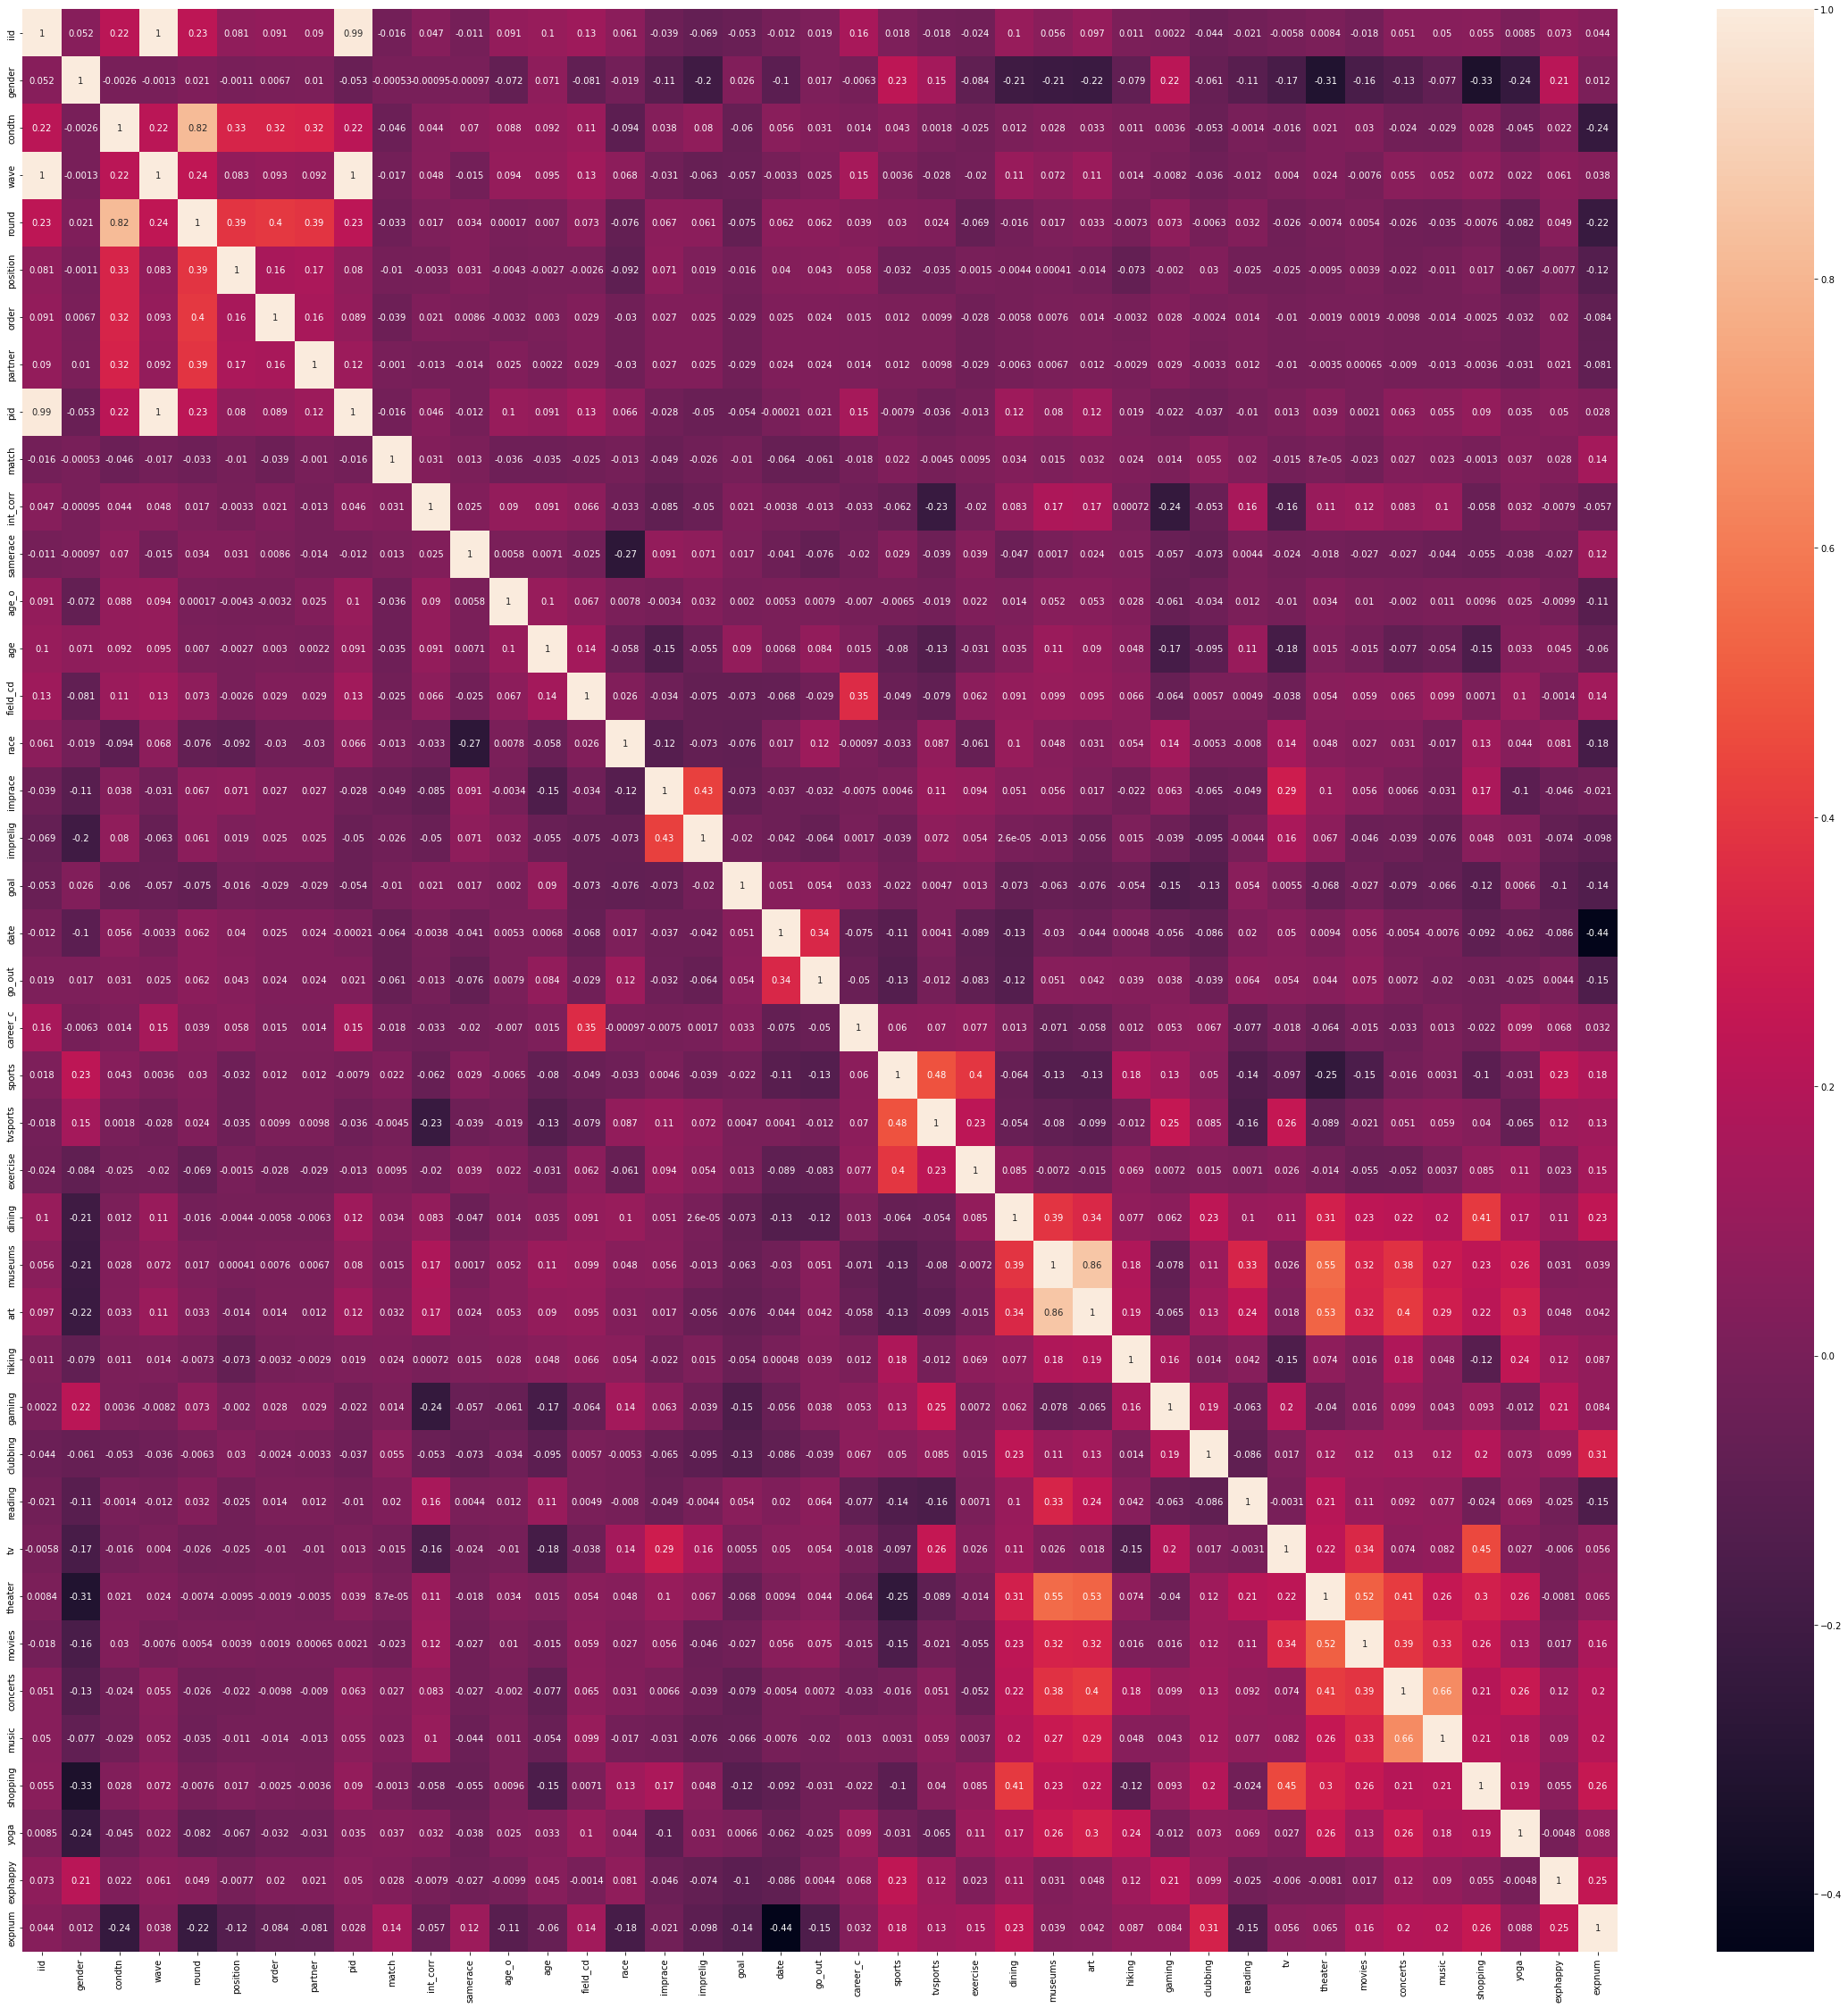

In [11]:
fig, ax = plt.subplots(figsize=(40,40)) 
sns.heatmap(data=correlation,
            annot=True, 
            ax = ax); 

Je classe les variables dans le sens décroissant uniquement sur la colonne 'match'

In [12]:
correlation['match'].sort_values(ascending = False)

match       1.000000
expnum      0.143755
clubbing    0.055435
yoga        0.036601
dining      0.033912
art         0.031545
int_corr    0.031121
exphappy    0.027880
concerts    0.027034
hiking      0.024143
music       0.023093
sports      0.021666
reading     0.020222
museums     0.014954
gaming      0.013543
samerace    0.013028
exercise    0.009470
theater     0.000087
gender     -0.000530
partner    -0.001041
shopping   -0.001333
tvsports   -0.004472
position   -0.010210
goal       -0.010306
race       -0.013268
tv         -0.014542
iid        -0.015806
pid        -0.016343
wave       -0.017404
career_c   -0.018112
movies     -0.022989
field_cd   -0.024641
imprelig   -0.026014
round      -0.033257
age        -0.035055
age_o      -0.035865
order      -0.038731
condtn     -0.045960
imprace    -0.049032
go_out     -0.060526
date       -0.063610
Name: match, dtype: float64

Il n'y a pas vraiment de variables significatives qui ressortent

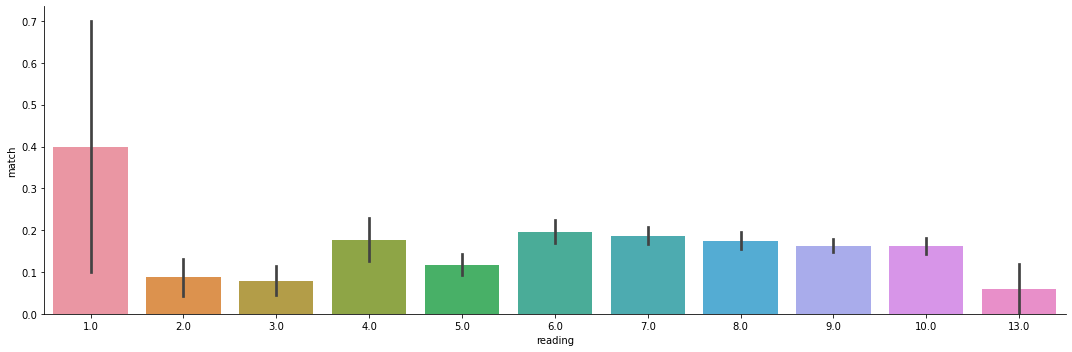

In [13]:
sns.catplot(x="reading", y="match",
            data= dating_df, kind="bar",
            aspect=3, height=5);

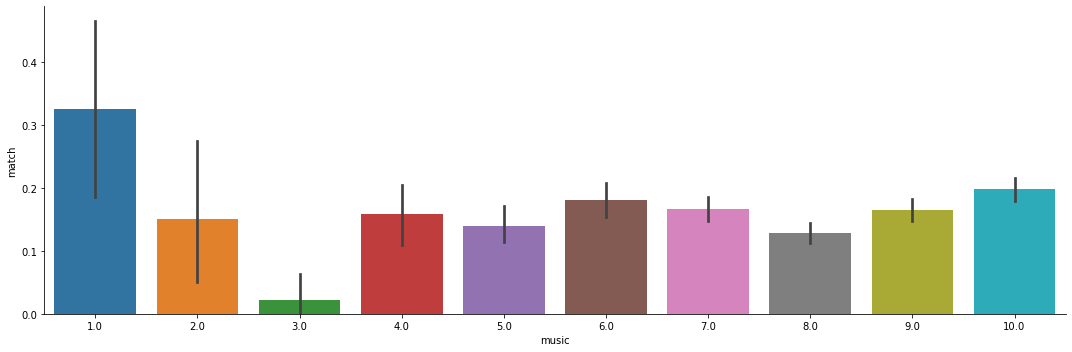

In [14]:
sns.catplot(x="music", y="match",
            data= dating_df, kind="bar",
            aspect=3, height=5);

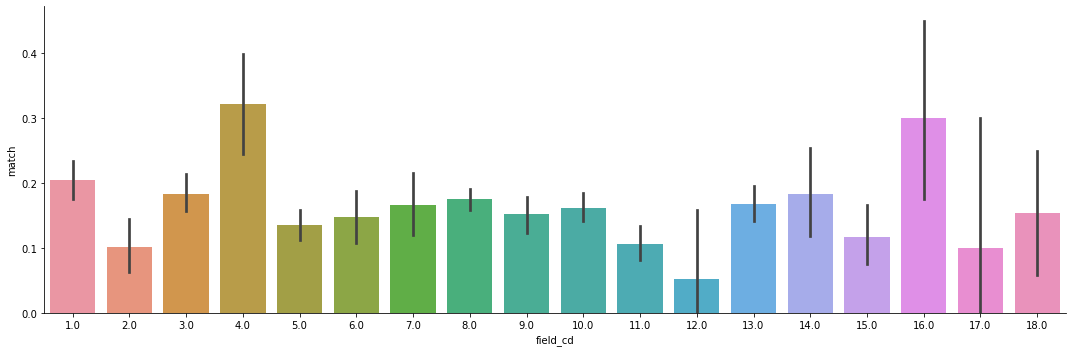

In [15]:
sns.catplot(x="field_cd", y="match",
            data= dating_df, kind="bar",
            aspect=3, height=5);

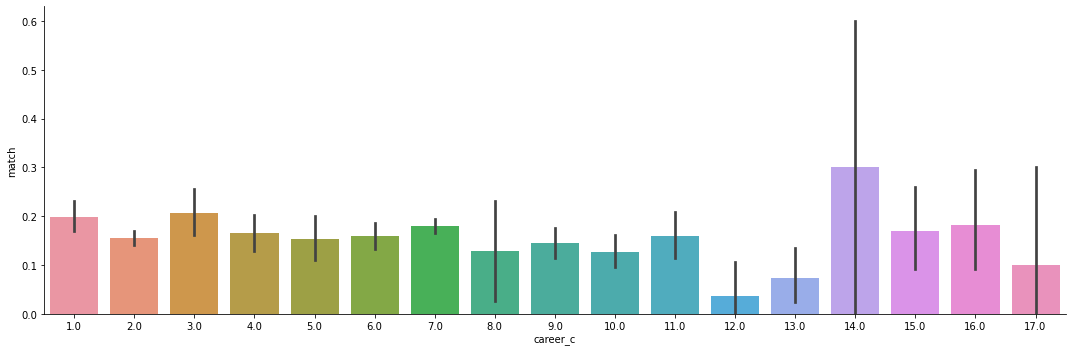

In [16]:
sns.catplot(x="career_c", y="match",
            data= dating_df, kind="bar",
            aspect=3, height=5);

In [17]:
df = px.data.iris()
fig = px.scatter(dating_df, x="iid", y="age", color="match", trendline="ols")
fig.show()

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



En conclusion, si tu as entre 25 et 27 ans, que tu aimes lire ou la musique, que tu as étudié les sciences et les langues, et que tu souhaites devenir sportif professionnel, alors tu as toutes tes chances pour matcher lors des prochains dates.

Un petit cadeau pour Sabrine, mon instructrice préférée!!

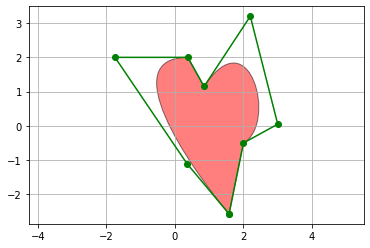

In [18]:
fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()